In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ts_data = pd.read_csv(r'C:\Users\kashy\turbidity.csv')

In [3]:
ts_data

,Date,Turbidity
0,01-01-2011,20.038210
1,12-01-2011,19.708710
2,24-01-2011,20.641247
3,04-02-2011,20.419380
4,16-02-2011,19.577298
...,...,...
345,14-11-2021,40.787799
346,26-11-2021,40.412594
347,07-12-2021,39.909099
348,19-12-2021,40.846416


In [4]:
ts_data['Date'] = pd.to_datetime(ts_data['Date'], format='%d-%m-%Y')

In [5]:
ts_data.set_index('Date',inplace=True)

In [6]:
ts_data

,Turbidity
Date,
2011-01-01,20.038210
2011-01-12,19.708710
2011-01-24,20.641247
2011-02-04,20.419380
2011-02-16,19.577298
...,...
2021-11-14,40.787799
2021-11-26,40.412594
2021-12-07,39.909099


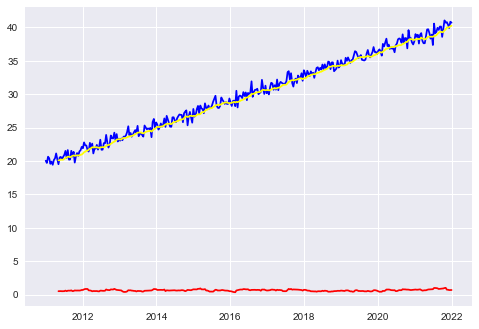

In [7]:
plt.style.use('seaborn')
rol_mean = ts_data.rolling(window=12).mean()
rol_std = ts_data.rolling(window=12).std()

plt.plot(ts_data, c='blue')
plt.plot(rol_mean, c='yellow')
plt.plot(rol_std, c='red')

In [8]:
from statsmodels.tsa.stattools import adfuller
dftest= adfuller(ts_data['Turbidity'])
print(dftest)

(0.25205142906550726, 0.9750344672661406, 15, 334, {'1%': -3.450081345901191, '5%': -2.870232621465807, '10%': -2.571401168202517}, 664.8999100836352)


In [9]:
ts_data_new = ts_data['Turbidity'] -  ts_data['Turbidity'].shift(2)

In [10]:
adfuller(ts_data_new.dropna())

(-8.770878361614141,
 2.5230548519343787e-14,
 13,
 334,
 {'1%': -3.450081345901191,
  '5%': -2.870232621465807,
  '10%': -2.571401168202517},
 671.636741870082)

C:\Users\kashy\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\kashy\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\kashy\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


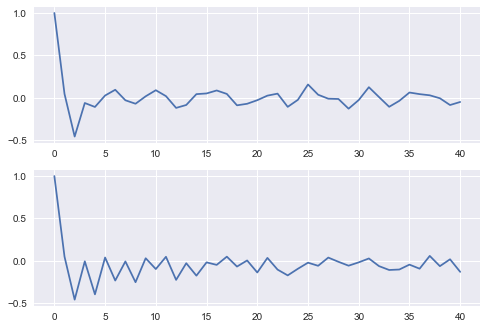

In [11]:
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(ts_data_new.dropna())
pacf_plot = pacf(ts_data_new.dropna())

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_data, seasonal_order=(2,2,1,12))
model_fit = model.fit()

C:\Users\kashy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\kashy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\kashy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [13]:
res = model_fit.forecast(24)

C:\Users\kashy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [14]:
res = pd.DataFrame(res)
res.columns=['Turbidity']
ts_data_pred = pd.DataFrame(ts_data)
ts_data_pred = ts_data_pred.append(res)


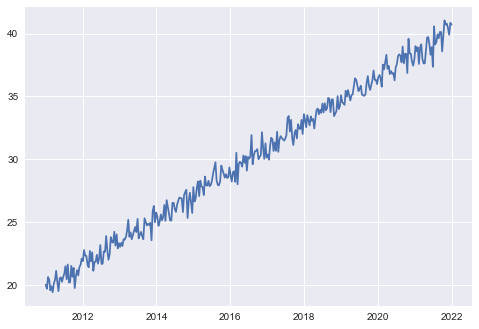

In [15]:
plt.plot(ts_data_pred[:350])

In [16]:
from datetime import datetime, timedelta

start_date = datetime(2022, 1, 1)

date_list = []
for i in range(len(ts_data_pred[350:])):
    date_list.append(start_date + timedelta(days=i*11))

In [19]:
temp = ts_data_pred[350:].reset_index()
temp['index'] =  date_list

,index,Turbidity
0,2022-01-01,39.877023
1,2022-01-12,40.168312
2,2022-01-23,40.512109
3,2022-02-03,40.175708
4,2022-02-14,40.816547
5,2022-02-25,40.624872
6,2022-03-08,40.903862
7,2022-03-19,39.775786
8,2022-03-30,41.438575
9,2022-04-10,40.846172


In [21]:
temp.set_index('index',inplace=True)

In [22]:
ts_data

,Turbidity
Date,
2011-01-01,20.038210
2011-01-12,19.708710
2011-01-24,20.641247
2011-02-04,20.419380
2011-02-16,19.577298
...,...
2021-11-14,40.787799
2021-11-26,40.412594
2021-12-07,39.909099


# The red line below shows the predictions

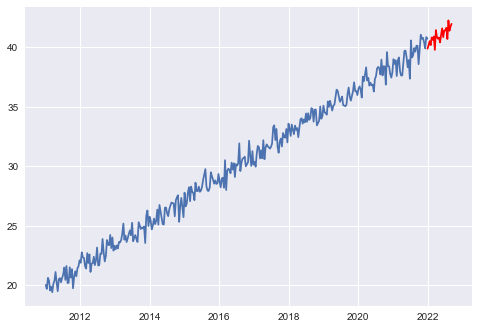

In [25]:
plt.plot(ts_data)
plt.plot(temp,c='red')

In [29]:
final = pd.concat([ts_data,temp])

In [30]:
final

,Turbidity
2011-01-01,20.038210
2011-01-12,19.708710
2011-01-24,20.641247
2011-02-04,20.419380
2011-02-16,19.577298
...,...
2022-07-29,40.687787
2022-08-09,42.251613
2022-08-20,41.383355
2022-08-31,41.732508
